# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline


In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



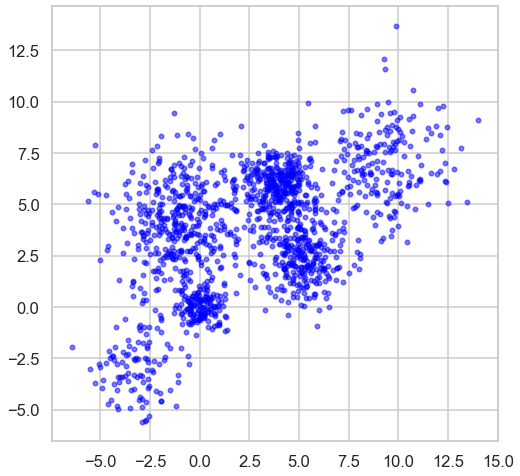

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(Multi_blob_Data)
y_kmeans = kmeans.predict(Multi_blob_Data)

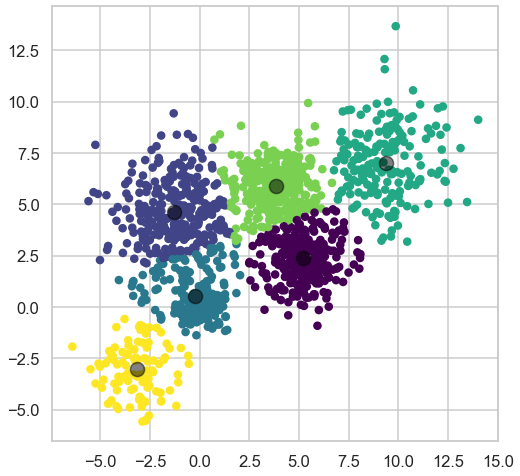

In [6]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [7]:
from scipy.spatial.distance import cdist

In [8]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(Multi_blob_Data)
    kmeanModel.fit(Multi_blob_Data)
  
    distortions.append(sum(np.min(cdist(Multi_blob_Data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / Multi_blob_Data.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(Multi_blob_Data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / Multi_blob_Data.shape[0]
    mapping2[k] = kmeanModel.inertia_

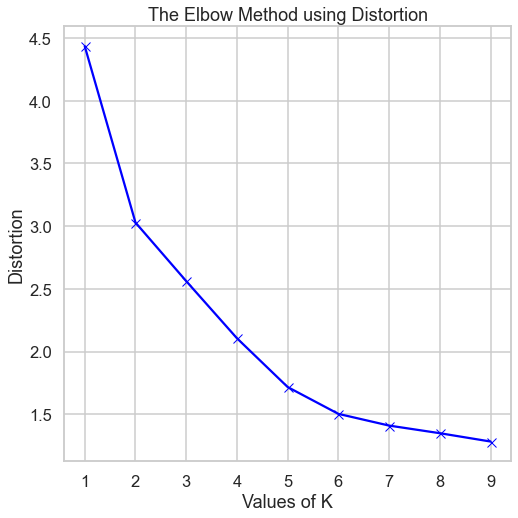

In [9]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [10]:
score = silhouette_score(Multi_blob_Data, kmeanModel.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.449


In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

In [12]:
! pip install yellowbrick

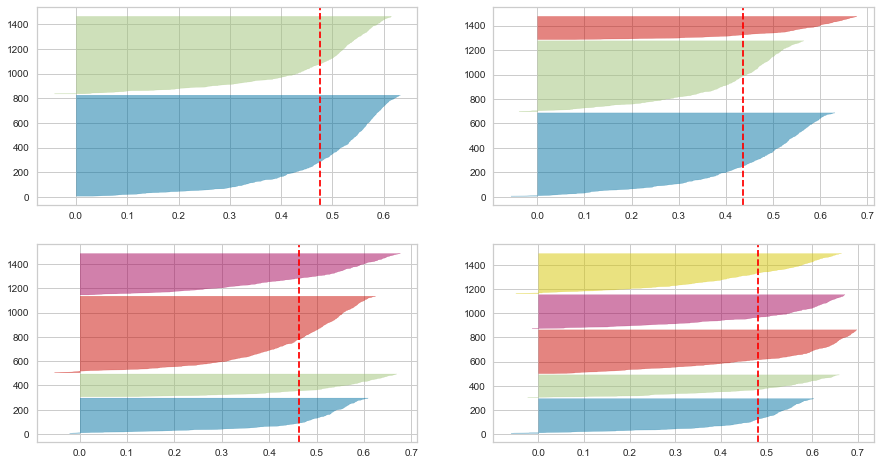

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    kmeanModel = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeanModel, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [14]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [16]:
HC = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='single', distance_threshold=1)
HC.fit(Multi_blob_Data)
labels = HC.fit_predict(Multi_blob_Data)

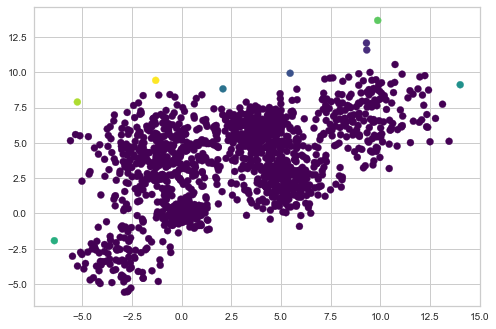

In [17]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.show()

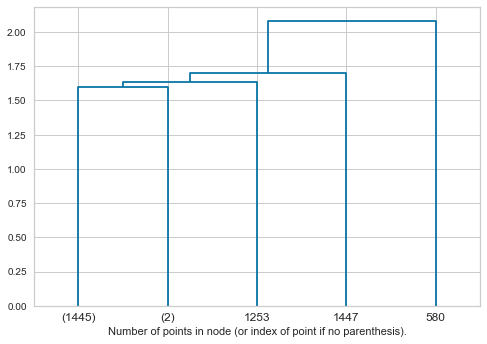

In [20]:
plot_dendrogram(HC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [47]:
score = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.469


In [21]:
HC = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average', distance_threshold=1)
HC.fit(Multi_blob_Data)
labels = HC.fit_predict(Multi_blob_Data)

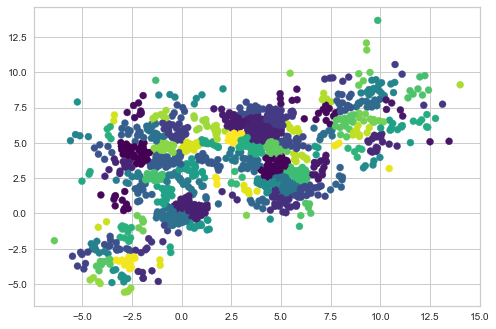

In [22]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.show()

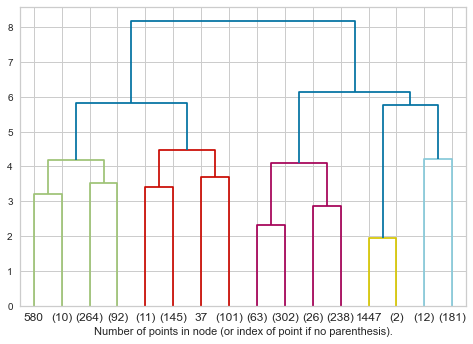

In [23]:
plot_dendrogram(HC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
score = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

In [24]:
HC = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='single', distance_threshold=1)
HC.fit(Multi_blob_Data)
labels = HC.fit_predict(Multi_blob_Data)

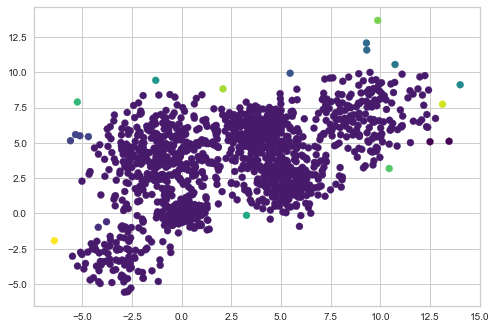

In [25]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.show()

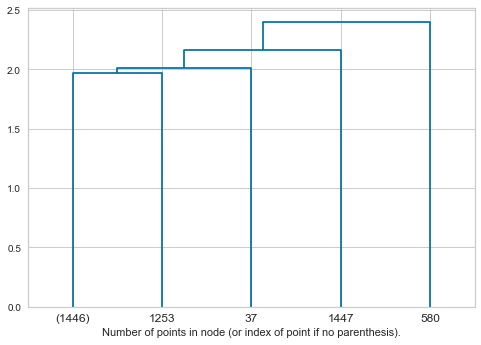

In [26]:
plot_dendrogram(HC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
score = silhouette_score(Multi_blob_Data, labels, metric='manhattan')
print('Silhouetter Score: %.3f' % score)

In [27]:
HC = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average', distance_threshold=1)
HC.fit(Multi_blob_Data)
labels = HC.fit_predict(Multi_blob_Data)

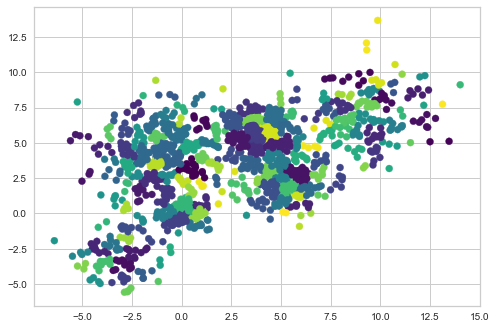

In [28]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.show()

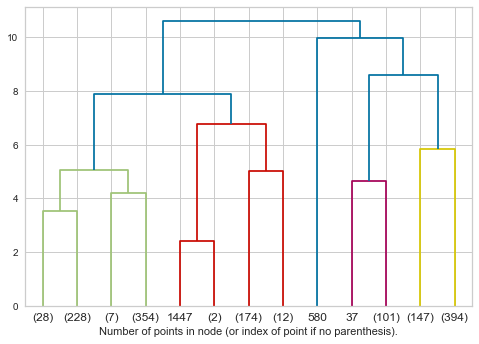

In [29]:
plot_dendrogram(HC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
score = silhouette_score(Multi_blob_Data, labels, metric='manhattan')
print('Silhouetter Score: %.3f' % score)

In [33]:
HC = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='single', distance_threshold=1)
HC.fit(Multi_blob_Data)
labels = HC.fit_predict(Multi_blob_Data)

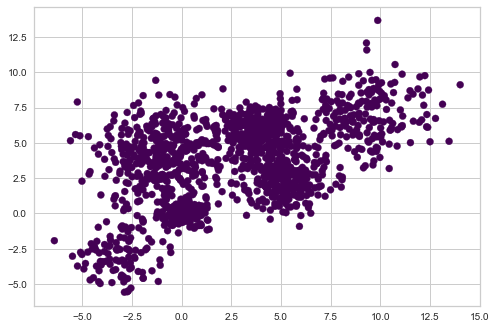

In [34]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.show()

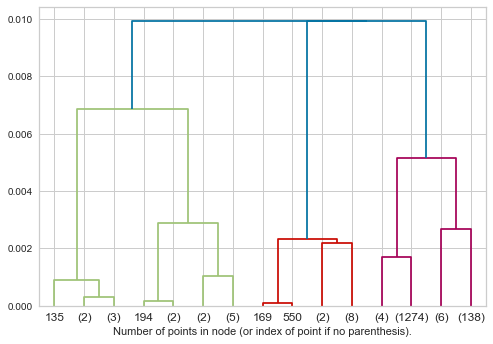

In [35]:
plot_dendrogram(HC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
score = silhouette_score(Multi_blob_Data, labels, metric='cosine')
print('Silhouetter Score: %.3f' % score)

In [36]:
HC = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=1)
HC.fit(Multi_blob_Data)
labels = HC.fit_predict(Multi_blob_Data)

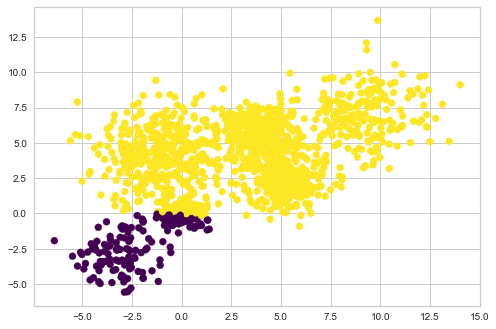

In [37]:
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.show()

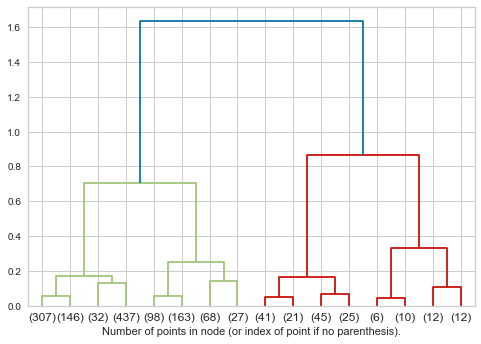

In [38]:
plot_dendrogram(HC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
score = silhouette_score(Multi_blob_Data, labels, metric='cosine')
print('Silhouetter Score: %.3f' % score)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [48]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import product

In [92]:
eps_values = np.arange(0.1,3,1) 
min_samples = np.arange(5,25) 
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
epsvalues = []
min_samp = []
for p in dbscan_params:
    dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(Multi_blob_Data)
    epsvalues.append(p[0])
    min_samp.append(p[1])
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
    #sil_score.append(silhouette_score(Multi_blob_Data, dbscan_cluster.labels_))
eps_min = list(zip(no_of_clusters, sil_score, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])


In [ ]:
min_samp

In [ ]:
epsvalues

In [ ]:
no_of_clusters

In [ ]:
sil_score

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 